In [2]:
#!/usr/bin/python
# Add module path
import sys
import os
currloc = os.getcwd()

sys.path.append(currloc+'/../../devito/')
sys.path.append(currloc+'/../../examples/')
sys.path.append(currloc+'/../acoustic/')
from numpy import *
import numpy as np
from scipy.ndimage.filters import gaussian_filter
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Circle
from examples.containers import IShot, IGrid
from examples.acoustic.Acoustic_codegen import Acoustic_cg
from devito import clear_cache
from matplotlib import cm
from scipy import ndimage
from examples.containers import IShot, IGrid

/Users/emmapearce/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/emmapearce/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/emmapearce/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:38: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/emmapearce/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


AxesImage(54,97.38;334.8x100.44)


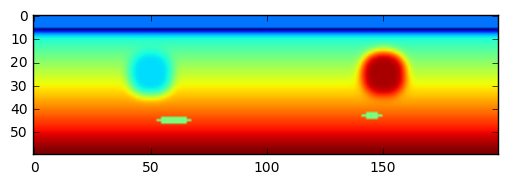

In [3]:
def create_test_model(lx,ly,dx,water_depth):

#DEFINE MODEL SHAPE
    size = (int(lx/(dx)), int(ly/(dx)))   # array can only be whole numbers took away the +1 
    model = np.ones(size) 
    sf_grid_depth = water_depth/dx  # puts depth of sea floor into grid spacing defined by dx
    max_v= 3000. # m/s  velocity at bottom of sea bed 
    seabed_v = 1700. # m/s velocity at top of seabed 
    water_v = 1500. #m/s water velocity 
    m = (max_v-seabed_v)/(size[0]-1-sf_grid_depth)  # velocity gradient of seabed THIS IS WEIRD 
    
#SET VELOCITY OF SEABED (uses velocity gradient m)
    for i in range (sf_grid_depth, size[0]):
        model[i][:] = (m*(i-sf_grid_depth)) + seabed_v
            
#ADD CIRCLE ANOMALIES - REFRACTORS   
    radius = 500./dx  #radius of both circles
    cx1, cy1 = 7500./dx, 1250./dx # The center of circle  
    yc1, xc1 = np.ogrid[-radius: radius, -radius: radius]
    index = xc1**2 + yc1**2 <= radius**2
    model[cy1-radius:cy1+radius, cx1-radius:cx1+radius][index] =  2900.   #positive velocity anomaly 
    
    cx2, cy2 = 2500./dx, 1250./dx # The center of circle 2 
    yc2, xc2 = np.ogrid[-radius: radius, -radius: radius]
    index = xc2**2 + yc2**2 <= radius**2
    model[cy2-radius:cy2+radius, cx2-radius:cx2+radius][index] = 1700.   #negative velocity anomaly 
    plot = plt.imshow(model)
    
#BLURR CIRCLES
    blurred_model = gaussian_filter(model,sigma=2)   

#ADD REFLECTORS - NEGATIVE ANOMS     
    ex1, ey1 =3000./dx, 2250./dx # The center of reflector 1   
    rx, ry =350./dx,  75./dx
    
    ye, xe = np.ogrid[-radius: radius, -radius: radius]
    index = (xe**2/rx**2) + (ye**2/ry**2) <= 1 
    blurred_model[ey1-radius:ey1+radius, ex1-radius:ex1+radius][index] = 2000.   
    
    ex2, ey2 =7250./dx, 2150./dx # The center of reflector 2 
    rx, ry =200./dx, 75./dx     #up and down radius 
    
    ye2, xe2 = np.ogrid[-radius: radius, -radius: radius]
    index = (xe2**2/rx**2) + (ye2**2/ry**2) <= 1 
    blurred_model[ey2-radius:ey2+radius, ex2-radius:ex2+radius][index] = 2000.  
    
    #SET VELOCITY OF WATER 
    for i in range(0,sf_grid_depth,1):
         blurred_model[i][:] = 1500.
     
    # view and save image         
    testplot = plt.imshow(blurred_model) 
    plt.savefig("testplot.png")
    return testplot  


dx = 50
lx = 3000
ly = 10000 

size = (int(lx/(dx)), int(ly/(dx)))   # array can only be whole numbers took away the +1 
print create_test_model(3000,10000,dx,300)


(0.6702127931559458, 5969)


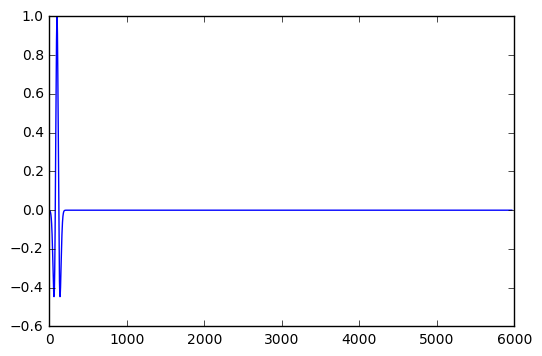

In [4]:
#set up source as ricker wave for f0
def source(t,f0):
    r = (np.pi * f0 * (t-1./f0))  #equation for a ricker wave 
    return (1-2.*r**2)*np.exp(-r**2)
#define seismic data 
data = IShot()

f0 = 0.015
dt = 0.67021279315594584   #THIS IS NOT RIGHT 
t0 = 0.0
tn = 4000 #is this meant to be an int 
nt = int(1+(tn-t0)/dt)
origin = (0.,0.)

print(dt,nt)
t_axis = [1e-3*dt*t for t in range(0, nt)]
time_series = source(np.linspace(t0, tn, nt), f0)  # Generate the source time signature

# Receiver coordinates. The receivers are located at the ocean bottom (200 grid points) 
#and at every grid point along the x axis
receiver_coords = np.zeros((1601, 2))
receiver_coords[:, 0] = np.linspace(origin[0],{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 2,
   "metadata": {
    "collapsed": false
   },
   "outputs": [],
   "source": [
    "#!/usr/bin/python\n",
    "# Add module path\n",
    "import sys\n",
    "import os\n",
    "currloc = os.getcwd()\n",
    "\n",
    "sys.path.append(currloc+'/../../devito/')\n",
    "sys.path.append(currloc+'/../../examples/')\n",
    "sys.path.append(currloc+'/../acoustic/')\n",
    "from numpy import *\n",
    "import numpy as np\n",
    "from scipy.ndimage.filters import gaussian_filter\n",
    "%matplotlib inline\n",
    "import matplotlib.pyplot as plt\n",
    "import matplotlib.image as mpimg\n",
    "from matplotlib.patches import Circle\n",
    "from examples.containers import IShot, IGrid\n",
    "from examples.acoustic.Acoustic_codegen import Acoustic_cg\n",
    "from devito import clear_cache\n",
    "from matplotlib import cm\n",
    "from scipy import ndimage\n",
    "from examples.containers import IShot, IGrid"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "metadata": {
    "collapsed": false
   },
   "outputs": [
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "/Users/emmapearce/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future\n",
      "/Users/emmapearce/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future\n",
      "/Users/emmapearce/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:38: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future\n",
      "/Users/emmapearce/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "AxesImage(54,97.38;334.8x100.44)\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAfwAAAC4CAYAAAAG7F7dAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAAPYQAAD2EBqD+naQAAIABJREFUeJztvXuwJFl93/n5ZWZV3Vc/ZnqYnpEAzWAQGlkYiQEDu9Zj\nNRtmkcM2foSkWW3Mah2EQ1hEEDjCi73BLmOGkHdRSExoFyL4w2Hkh/ASsh1IrMTYwrLNQ0AYRgIk\nBjQwI4ZhuplXd9++91ZVZp7f/nHOyTyVt+69Vd23+r5+n4ic6srKyjx3sk5+z+9xfkdUFcMwDMMw\njjfZQTfAMAzDMIzFY4JvGIZhGCcAE3zDMAzDOAGY4BuGYRjGCcAE3zAMwzBOACb4hmEYhnECMME3\nDMMwjBOACb5hGIZhnABM8A3DMAzjBGCCbxiGYRgngIUJvoj8oog8JiJbIvJZEXnNoq5lGIZhGMbu\nLETwReRngF8B3gX8CPBHwEMicssirmcYhmEYxu7IIhbPEZHPAp9T1beF9wI8Afyaqr533y9oGIZh\nGMauFPt9QhHpAXcDvxT3qaqKyO8Br59y/DngDcDjwHC/22MYhmEYx5gl4A7gIVV9drcD913wgVuA\nHLjY2X8RePmU498A/KsFtMMwDMMwTgo/B/zGbgcsQvDn5XEA+qfh1h+e/OSON8Cd/8ONb5GxP/z+\n2+G/e99Bt8LYL+x+Hi/sfh49Hvs4PP7Q5L7xOnz3YYhauguLEPxngBo439l/Hrgw5Xjvxr/1h+Fn\n//MCmmMcGIMzcP5VB90KY7+w+3m8sPt59Dj/Knjd/za57+IX4V/cDTOExPc9S19VS+ALwD1xX0ja\nuwf4zH5fzzAMwzCMvVmUS/9XgQ+JyBeAzwNvB1aADy3oeoZhGIZh7MJCBF9VPxLm3L8b78r/Q+AN\nqvr0Iq5nGIZhGMbuLCxpT1U/AHxg5i/c8YZFNcU4KH7g3oNugbGf2P08Xtj9PHEcnlr6lo1//LjL\nHijHCrufxwu7nyeOwyP4hmEYhmEsDBN8wzAMwzgBmOAbhmEYxgnABN8wDMMwTgCHobSu58knYPP0\nQbfCMAzDMI4Ozz8x86GHR/Af+TIMrh50KwzDMAzj6DB6bOZDD4/gf/cyyK4r+xmGYRiGkaKXZz70\n8Aj+2g9BMW31XMMwDMMwplKdgUuzHXq4BH9gKzcZhmEYxsyMekdQ8O8SuFkOuhWGYRiGcXR4TuDb\nsx16iAQfeOFBN8IwDMMwjhDfBv7DbIfOLfgi8qPAPwDuBm4H3qSqv9U55t3Am4GzwKeBt6jqo7ue\n+MUO/pybtzmGYRiGcXLJZtfNa7HwV/HL3f5T4N92PxSRdwBvBe4DHgfeAzwkInep6njHs97m4EUm\n+IZhGIYxMxsLFHxV/TjwcQARmRZ0fxvwgKp+LBxzH3AReBPwkZ3Om50rkdt2Hg8YhmEYhjGJPl0y\nq+TvawxfRO4EbgM+0TRG9YqIfA54PbsI/srKBvmpK/vZHOOaEBRQDj6BUmhbYxiGYWynXtlg1pJ1\n+520dxv+6Xyxs/9i+GxHllc36Z9a3+fmGNeCI8MdCsFXMjSIvmEYhtFlvLp5YIJ/zaz//feQnTk1\nsW/t3jeydu9PHVCLTi7bJTa+X/QgIPoV2quZ2BvG7LQ9dad+s7PvbqdP2l558EbASefqh3+Hqx/+\n3Yl97vLshvJ+C/4F/HP6PJNW/nng4d2+eNv73s7yq35gyiej/WudcU34AYAsvMP7KxwG34JhHE0k\n6a3TP3c7fLZzH79R/d/Ym8G993Du3nsm9m198REev/t/mun7+yr4qvqYiFwA7gG+BCAip4HXAu/f\nvSEVPcr9bI6xj0w+Rvaz47ePkd0eVIZx0pilL6THxHyXNgw22bfaz7aneOlEAE06+2Wq6M86ALCB\nwmIpqWY+9lrm4a8CL6V96r9ERF4JPKeqTwAPAu8UkUfx0/IewJcG+Ohu5+1RmuAfUlKX3n5LcnTb\n7+2KNIyTxSy9bbscx811JHxy6zI5VJj9TLthXoEbwzy6eS0W/quB3yf+RuBXwv5fB/6Oqr5XRFaA\nD+IL73wSeOOuc/CBnJpijpGKcWPodtj9Tuiblphnom+cdHYT53Rf1shx+up7aRbed4+ZLvipwGfN\nq0vOqM1Z22N2i+9bKODGkFPPfOy1zMP/z0C2xzH3A/fPc96Ckh42D//gmO6u6+6T8N/J7/nXWa9C\nR9x3EvzJB5O5+42TQ9r7uiId32eJJE9uNRmOgpo8/DubkO/J/tUV+/YsORV5eJ9PuUq+Tfgnz5de\nxVgUxYIt/IVgMfyDJY3hTe7b3pklGe/N4+afZrVM25c+lNpjdko2MozjiyQ9M5I1ElxPbHFfFt77\nZ2o18XnX0p9m2cczVhSUzbAhb67omivkyWeTzwTXeW4Yi2Mez/ghEvyanrn0bzjtKFxQ3IRlPy1+\nN/ndvZN5UpFWhCwkDHXFuxs1TK3+dkBgDkLjpND2xOhMj2LtpbdqRD0aS/HfRfh3P+RFFR3RbwXf\nTQz0o+WenqWk35y53naVXjMwSC3/VPCjj8JYHMUiXfqLwmL4B0NXsLsiLvicXreL9d8dzbeegmiZ\npOKe7SL63cdG1/rfbu0YxnFk2uA3PiNToe8zpkdJn3GzxQToAaPmffxe9AJ0BX/Sje/PPqbPiEEI\ntvab17iV4UpV8ALEVzfhQ5h8bhj7z0Jj+IvCBP/Gs5PYp5LbPXYyBaj9dzoJKBX87hUUxQXRb9OB\n2mhlpBunTPfNHkQwjKPBNI9X7B9RQqMl3xX4ASOWGLLEsPn3gFGz9VxJT0sKrcmcI9cwTFdFJfRr\nyaglo84yKulRSsFI0rMMwhX8NmLQDAii+Eerv80iaFMHU2wAsL8cScG3GP6NY5obPrWt2+Ogm5nb\nduacnV14MdbfvVobHPBnEXIEqIMnIeYHaOP+7wp/181vwm8cB6bltkwm3/l4fLTclxiyzFYjwSts\nNtsyWxOf9bSkX5UUdU1eK3kNOEUUNIyzXS7UuVDlQln0KPNeI+xbLLPJSvMa/50OAIYsTVj8VRPz\nnxR8C8rtP0cyhm8W/o1jlth7KvaTSToxO9e/T52OOyXq+GfKpJs+JyOjRqnJm6PSefmuefxFwY+/\nD2laZ4JvHA+mDWbzROgLqsZFv8xWI+6rbPhXt8mq22DVbbLsNll2Wwx0xMCN6JUlvbKiKB15CXkF\nOHwnFyADl0Pdg7qAst+j7BWMsgGjbMAwW2IzW2ErW+FqtsKGrLIpK2yw2gwAepQT1r5P9mtd/NNC\nhsb+cCQt/OimMvaH1sW+8/zY1HKfTK7bLvYxQacr+t15udPm6E9a9v7BVpORN56CGkcdvALxuAzF\nTZxDOufoZvNP/oU2Icg4WnS9WW1CnpfRaLmvssEaV1njKqdY5xTrrFWbrI62WBqO6A1LesOSfFRT\njCqykSMfKdkYpAKi4DsawZccsh5ID2RQU/SV3kBZHpRUS0PKpQ3Gy32uDpbZGKywzhrrnAqtWGPA\nqPEAxEyCKonvx2cEmEt/v1l04Z2FYC79/cclnaxLKuj+WC/6caDgwtZOz4mdd9LCT+323abidBPx\ncmrqZgiRN9Z7FHGHhBZFy7/9Xhr/nybq6QDDMI4S8ffd5sJXTRQ9FfnTXOE0VzjDZc5yibVyi9XN\nEf0rFVzBb+vAVWALGAKjnQWfIPj0IF92sORgtYJT+O0MuFq4Kkts9Je4LKe5xFmW2Wo8D+ucIsMx\nZImCPmPq5q/oWvrG/nEkXfpxooexX3Qnsk06DKNHL62h1EbX82SiT28iI7cmp9IQv9ccpxmq4l+Z\nPnpPi4dkmSMTRy3Bvhcv+t15vPF7GZr8DfF8kyVAthf/3V7gxzAOM/E3G31obc+LLvytIPKXOesu\nc7a+wpnyCstbWyxvbrF0pSS/5JBLtIJ/lUnBH+PFvmaqhU8B9IClsK0CazSCL2eUwdkKzg7JVoSl\n5ZLVwRbL+ZBBPqJHGZ4cK2yxQk6dPDd8XN+K8ew/R1Lw42QQY3/Zni4X3e+QJZHy9LN6mzOxN5GJ\nW9MKfV3nOJehrh1QTG+F/yjPa7I8WOjSTjWaPlDwn6eCP+n29HbDZEaCFegxjh6xd8bpczE5b8CQ\nNTZY5SpnucTNPM/N7nluLi9z09YVsmcd+bOO7FlH9ozC80wK/gZe7KPg12FTJi38YOXTAwa0gr9K\nK/hnoXeuojhXs3Su5My5q6zJJv3+iCIfh1hy9MJNJtrW1GQUE7N6jP0hP5qCb0l7i6JbWCN13ZMI\nfpqcF934JT3GGix87VFpQa1e5Jut9oK/JwK1y8ldjWTe2neS+alBIhPHtW7/7eU7o7DHwEI6hWn7\nvH/DOLzEwWk69S7Or48x+1PBfX9z/Tw3189z0/Ayp9c3WL488ouQXwR5GngGL/iXQdeBTdBNcENw\nI9ASNFj26kAVJKT5SOY3csiXIBuArAArIGvAaS/4+RWFdSXfclACY3CnhGxVvZcgh1zqZEDu/11R\nkOEm5uibpb8/HMmkPau0txgmF8X0E30gD9Z9G7+Pn20T+2jha5/KFdQup67zxrJ3tRd91b0FX1Ak\nV+osJ8sdeVajuaCZ4PIsHrQtS7lIMgCAxHpoMwomK4jZY8Q4GnRzU+I8+yWGrAbLPsbpb64uccvw\nEqcub9B7uoTvAhdAnsKL/bN4wV/3mw7BbUE58ltVeZF3Ggz8IPgZ4VUgy6A/gF4fsmW/NVb+pfbc\nbAJD6A0rTr1gk57U3iuQE/qlNpuglPQawU/9claF7/pZWKU9EflHwN8AfgAfGfoM8A5V/XrnuHcD\nb8avlvdp4C2q+uhu5zYLf3GkNbLbOe5de7ldLKOioNKOhe96VHXhhb7KGtFXJ6jL0NmK6ZPVisuU\nLPdi7zTD5cHzkKkXfA0PQfG/ibQoaFf00yrfJvjGUSINT8XYfT+J269xlVO6zk16iZv0eW4aXeHM\n+jrLz43hAvAk8JTf9BnQZ0Evg26A24B65LdxCaMxlK4N3cct62y5QNWDQR/yPuSDIPxrIFdANoAN\nkBFQQlE5ChnRL0oqzdACJFdUskbL05oaae19S+LbHxZp4f8o8H8D/zV8958A/15E7lLVLQAReQfw\nVuA+4HHgPcBD4Zgd592Z4C+OKOYRDZPg2vcSbOW2lldTx0v7lHWPsiqoG8FvrXtVASczWfgALgsV\nvhRUhUxdGDQIUoQsANGJ+H6cI5DOAoiRwDx5WHaL8xjGYSRNn42/19SVP2DECpuscZXTXOFsfYVz\n5WVWr2xRPF17kf8OXvAvAE+Bew7c81Ctw2gI4yGUNVS1fx3rZK5eDHxJsmVArtCroT+GooZiDP0R\nDIbQ24S8hGycnAT/xUyUVTck6yn0M6pej1raxXXi3xlzgOJUPZuXf/0sTPBV9afS9yLy83jH0t3A\np8LutwEPqOrHwjH34SNNbwI+snNDLGlvUaRiD+0UPEin4LXWfePKVx+3L+seVVVQVV7s6zoH9SKN\ny6CJ37c5ATuhKqhTyATnMrLa4QrBqYCAZjIRw+9Rdgp4tGQdsY//NsE3DjOp0KdFpdIqelHwz+gV\nbqouc250id6V2j9tn8KLfRT8i6DPQ30JRhtwtYLNyufojfGh9pirl+r0ZJta0S9qv/Xx23IGrgdy\nFWQM2bBzssxb9SvFkOW1IU4yRnmPMmuL77S5Cj5zP87MMdG/fm5klv5Z/C1/DkBE7gRuAz4RD1DV\nKyLyOeD17CH4Vnjn2tnZkS0TXaqimHB7R7HvzrevyJOYfUZdZ96yr3OIln2w7tEseYrs1Wmdf6q4\nDFX1U/rCt+pg2dd5TpXnVBJX7OrRZzxR6GdakZJW8N22q1qKkHFYiL/DKPpxYFtQNSVzY3GdVb3K\nYHNMdkl9nP5pvOg/7d347jkv9sOrsDX0Qr/pfLy1pBX7dOr99t4xmaxf4BP2q/D9SqGuoRrD8gYs\nA3kBWQHSp53Gt+wT/XquZLXYYFzE+vpeZrqu/a7gG9fGDRF8ERHgQeBTqvonYfdt+Ef/xc7hF8Nn\nO2KV9q6ddELaNGJ+Pkxa9/67bey+daCHYhmaUwerPoq91hla563AN6I/T4cNEi/gNLRa8Fn7WUYt\nOVXu29GjR0WZVOxq5+unCU9hiLKjhW/FeIzDhoSQVBZi9zFZLy2bu6Yb9LdGyPNB8L9LI/gEwa8v\nwXAI6yPYqGFLYUQr2I5Jd/5Ogp/jBb+kFf4eUKoPDVTOd/Oi8gdL7ivzsQSyDBqy+vu9ktW1DSry\nJjQYc4hSw6O7dodxbdyoSnsfAH4Q+G+v4xwNFsO/PiYFv5W1tIiNX65m0sJvBwvBPtbktZORHxP0\nGhd+tPLjChwztNIPEDL8yh2hrSJonVFneTNdL3N5GwOUySSfyTi+SwS/bjKE44hkMl5qYm8cBtpJ\nad1kvWjhr7hNVustVkZD+lcr5HlFnsP7Up8Dnge9BOU6DLdgo/RivxnEfsR0yz5Ov+8ibJ+WHwcK\nNYScGx/DL5y39LM+ZEv44jyrYfreKShWa1bOjKj6W2zlWwzzpcaDmHrmopXf/h8xroWFT8sTkf8H\n+CngR1X1qeSjC/jfzHkmrfzzwMO7nfOjb/80y2f6E/vuvvclvPrel1xLE08c2xeniLLXjqDzJHmm\n+910Dr6bIvbN1LvUstd5LXsmj5eQNhTyAVztrfssc+R5jst2FnvYXoSnnffbjQzG5XX9X2sYB0kU\n+252frsI7RYrzov9ysaY/IpDLuOnxV0CLvtNr8BoC9bL1rKP9XVijZ2u2O/0608/i4KvtDV6Innc\nMYTeBhTroT2nwuslKE7XyFWl6o9YWdpiKx9Q4dfjaP8fxDob2/u1sTP/9cPf5Asf/ubEvq3Ls3vG\n5xb8IPZ/HfhxVf1W+pmqPiYiF4B7gC+F408DrwXev9t5f/p9d/PiV52b8olZ/fOQzrn3rw5C0l49\nkcWuScJeNrHV6kW/mWdfZ8Gyz1rBnsuyjyTfjXaGeqvfJ/NlOKc459tQxxK+MjnL3p9pMobf5gO3\ns3zbb0yzaQzjYIjD8WnT8aKFv1xvMRiOGVyt/Lz3yzQV9PSKL6xTb/iM/M3KW/ap2EdX/m5WfRdN\nXuMWzYUmqS+MAvpjWNmE4ipk6/gBSdjydSW/WjNYKVnq+b/HB2xHE+LuyMjImfROGrvxuntfzOvu\nffHEvm998Vn+yd2/M9P3552H/wHgXuCvARsicj58dFlVh+HfDwLvFJFH8dPyHgC+DXx0t3ObS39/\n2F5CV5qulIWENi/4bXZ+KpV1rI/vpHHjk27RJT+vZb+toeH7LjoPM1TUz+kP0/TUiZ+r30h3+7d1\nLaScdt3wbiEes+qNw0Qq+N0FcpYYscIWS25EMarbBXDiFubYV1th+l3lp9x1M/Jnsep3ojtAiKGB\njDYvYFT5vIFsM1j6YX5+umVbjv6yz0sYsRSW02nd+DGmb4J/fSzSpf8L+N/Df+rs/1+Afw6gqu8V\nkRXgg/gs/k8Cb9xtDj7QPLCN60NxHWd2GyOLQuitexJneCqbreA3i+Jo1hH76PC7nk4awgPNwMGF\nqXrtQMNfv12FrxuM2G7Z+2qN6Zx8wzhspJ6pWFkvuvSjhT+ohxTDyot8rG4XRF83YbzpBXeUiH3c\n5rXsp5F+1+f/tGKfA+PaX7/Y8KI/IfhhYJINHf2qZJkhQ/ziOulyufEpZZn610c+x12edx7+TCmV\nqno/cP8857blcfeHSXe+kCUu/hgJzyaO0M53E6F3sajOtCvtR+fced5+uwLf9Nh9a/O3SXtFMtcg\nir5hHCbS3JJ2VbxW8AduxMCN6Y9LsqHzJWzjFla9cyM/TW6sIYOeSWFPXfLXQ7q+ThxENMKvYdqf\ng35Jmyk4bF9l7Mjrip4r6YsPWcScHKAZ9KT920R/fo7kanlWeGd/aGU8LifTOrizpEBtfI2PheYx\n1MTTpXGv+6z8G9cRmzYECz+KPrQJTzs9OE3wjcNKmneyXfBH9IPg96sRvbIkH+qk2If69Tr2dfHH\nQXTjirdpDH6/fvnxXGnGfhW2cZiu58IiOl3Rz0ZKUVX01U857Ml0C7+9ls2luRaOrOCbhT8/3SVp\n4yp4ray75v322HZXxlvRj72uWeDiBvRCVUHCtWMbunMP2kDFpDs/DhjTAjxZx+4x28E4SNLfcFsw\nKpaW8lZ+z5X0yppipL5efSqiwWevJdSuFd5p2fj7yTTRbzYFrdkeVxiDlEpeOYq6ppeV9PPxNsGP\nfdSs/GvnyAq+Fd6ZD902RoY483xibj35hDjuWW/+oPpb9CxMJAS2q26lnoko+L2mTNA0wW9zQlLP\ngGEcFJOi3w5UG8Gva4qxkg/DAjVdIS29wEbBn2fq3fWQiv7E9RQ0jjzKyU1KyEpHr6zp9Sp6ednE\n8WMBsJzaYvjXyZEVfLPw52O3Cnv+ceKP6Ip+d1W59t/hjDMtfbdYprnud5qKt13wY6Z+K/jp3HzD\nOEimhaLiVriKvFS/QE2aeh+3oPJOt4v9Iqx7mMwJiFuTFBjfVNO3vARXOYq8bv7Gkl6TU9QupGti\nf60cWcG3GP58THOBRQn3I2jXEfxqwtKPVrAkA4ADFcRQS18yRTLnX8X/VbvNu+8KfkHVzD/oWvYm\n+MZBkwp+L5TUbVawcA6pdFLgO6a8Om9ZL1rodyMVfd3B5y+h7VkJeeGS/lnSlto1wb9ejqTgx4e4\ncX2kUe4suM1iwdmC/jbX/mTG/sEuLSuikGmzPK5I6qDcqcjOpOjHxL143IEPYgyjQ5qD0rjyg+jn\nWnvBT93kqeiH7DzVjugewN/h8BZ+I/hpRl8q9pWSO0ehFYWU9Oih4dmUCr6J/rUxT3LyoRF8c+nv\nD21KW7swRU1FTT41zp3OwJ9w9UfLWhwqAnJjEve6pEVK2ooB2y361C2aDmbSxCDDOAykgl9QeSEM\nr7lzSK03JhtvESTiL8kAIHcxfFFRBQvf98/cLPzr5Eha+FZpb39ILfy6Kanrq1ZHd1qerCyXhwdP\naun7Gvf4Be0yBaf4Uj03vlO2i4y4sPk8367Yx78tFfx0CpRhHBbi4NX/jstW9LUiczWSBugP2oyf\nhzTAPzFpHzLnmr5aUTRZ+oI2Tx7j2lj44jmLwGL4+0Mq+FHoorWfWsHtStVlYzXn1GTiyCTEzzNt\ni2jfQKI7P7YlddF3xb5dzLdq/qa0nr659I3DQvwdpt6qImy51uSuJquDhb+TyIf+KNJ2zQPoomlT\nJq+din6M5ddKVqv/G9WLvsr2Snv+6yb883IkLXxz6e8PrV2bbetQ0QbuU9JjHF6jhZwU180ceV5T\nS6x1fYMJngWRvZL0tk/JiwOCdB6+Cb5xGJg+06Ty4u9q8tqR1W672Kdr1iaC39l1g/+W9vpT6Yq+\nc96tLzWVVBThm/H55L9icfxr4UgKvrn094c2/S5rHiqxI7XW/TgkCvktusILKgqpyLPgEs+cT5wT\nnTKMj1xrB41hg8nzpwl7WebIZXtyXuqlmDYPv0cZLCiL3RuHh7bodSv6zW9bvdhnMaKWin2qrjlI\ntn13Kvo7F6y+1nZv7+Xx2ts+i286E/cz5xP38syLvgvP+u2V9kz05+WIuvRLenajr5lYEa+dTZ8R\nl8ONpBb+oFl/O1r6yVxgqbzQ5jVZXvuV87JYEMfRLI17vSvmidI84TKH5N6zkGdh6yTk9ZuBSjtw\n6aWDlWQAsF3wzbVvHCzd2hKt4Fdk6sW+sexTRc/DVoTXDDJp/rltc7Tr2V/vL74z1mi25nrB2zAx\n8khREAfilKwO3kOpKaS18JNDO3uMWSjm8IwfIsGvTPCvg+7oWJGm1E7ET4gpk7W3RxOWfp8xhZTk\nWpFJEN2iDuvUB6Fnn5bHnRB7v2V5TVb4QUYmdbDut2fhx/b3kylN2+fhT5bWteQ947DQzjpJwlXq\nENUmXxbYUW0ln3Tpx49TF/t+JPWnl5+2NdZ919yfLJQJzsfx89r38TxzuGCV1tYnr5uFufRF5BeA\ntwB3hF1/DLxbVT+eHPNu4M34pXE/DbxFVR/duyG1Cf510C0tE+vop6LXx9eyHtMPa1QPwnKcQ7bC\netwDxs3KVi7LqPIeLndktVI7DcN52kx+tB0IzNDK5rvJTABfcMd5F37uKLKKnvgVtqInYolhsw2a\nto4S8W+3WFAoS/wdlhJkHBYa176Gpa2cI3eOrG7HwBPWfQH0wlZ4wS8y6Le7qMOhqdB3dXe+Nk5+\nv+ts6AF9gV4GWbG9jV1/fxbi+UWtuLxCNUy5lZkWYDV2YZ5l5ee18J8A3gH8Kf5W/jzwURH5YVX9\nqoi8A3grcB/wOPAe4CERuUtVdy2U7+OzxvWSZul7K7/9MUT7NwqoF/ytbUIareZKCp+8l+chnp+s\nZBVFe17XfrTs0xaH6npZcOk3gh8EPLYrbWezulhH9LvT8toqgoZxOEgXgMpUgztfyWvv/m46WVfw\nw6sUXvCjvvbws99y2tl8/jptPH8ewY/i3n2fNqcAeuLbkcURQNziqCCJ54tCXuML8LgazXy+jsME\n/3pZWAxfVf+/zq53ishbgNcBXwXeBjygqh8DEJH7gIvAm4CP7Hbu3NUUztw7+8HEmnJJrCyuRR1j\n+SMGrLDFFpsMWWKLZYYssRTsapf5YZjmgiu8G98JqGhYzS4W4wmrZu91+5oEPaUpo5srktfkRUWR\nV/SKkkE2bsR9ma1mW2Ezeb99kBKX4cy1rbBn0/KMw4ZoqA+hSuY0iL0Lse54EK3CRiHtAwPIBtDr\nw1IBYwdD1xbky5le+36eAW88NhrpaQpBHHv0Mxjk0O9BPvDtok/rdsiTExD+rhryWnGVLxeYicNl\n/vmkyMHMLTwG5O4GVNoTkQz4aWAF+IyI3AncBnwiHqOqV0Tkc8Dr2UPwC1fRq+2OXy8TU1xEcFkW\nXGdttn5N3uTqL7PJapDXrcR+HjOgzjJqydFCcBoGDpnisgxXZ2iM5cdAntvB2p8Q+tC6TJHcNVZ9\nXlT0izGDfMSSDFmWLVbYYplNltlkpbMts8VS4tofMPIxfi2DxZQuAWyCbxweRP00Ne/sUsRBVun2\nwHtqUgcO6vMZAAAZHElEQVSxZwmyJegvgQxgVEJ/3Ap++uiPlXhTS3+m9iWvqdA3Yg/0cxj0oB8G\nICzRin70RqRWfqy+Vyq5gKiv+aGZf07NHBU0tjGPoTy34IvIDwF/gL/F68DfUNWvicjr8b+pi52v\nXMQPBHYlr2qKyu74fuE7keBUvLs8mZ7nJGty21cZUAbneLSXS/qU0g/H5mjuM/QFpcoK6ixHshxX\nhTm0il/aNgui30XwWfhJ3D7L69aFH6z7QTFiKfNiv8omq2xMbF3BX2aLJU3CEK5sy5O6w7Hqn2F0\n8YLvhV5iFntSJx9ofehRZaOoLoEsQRFeB8CggiqZvp9q5/Vk6nejCdGAHxCs+4FvB+k2YFscv5lm\nWEOWAaWSOXCZeidhhn92GNdEXi1Q8IFHgFcCZ4C/DfxzEfmxazjPBP/wH8CZM5MN/5m/7TdjfjS4\n3l0mSF4hmfpOldG49aOlHxP5xvSp6IUitt4zoAhZ5sgKn1RX1j1K18PVNS7PccG1H9ex1ymCL4ng\nN3PsiyD2eUUvK+lnY5YzL+JrXGWNq5xindOsc5ornGKdU6w3wr+c5B70nXfnF3Xtk59cnM9sgm8c\nPqLIx9g2uoPgp2IfBX+53WQZ+g5WY3aU80I/ZnJWX+ran6l9Yeta9QNgNYNVgaUe5LE9K2HruvWj\n6Ie2UYOEKYVK+H8QI4OZ9dVZ+H9/028ply/P/v25BV9VK+Cb4e3DIvIX8bH79+J/J+eZtPLPAw/v\ndd73vQde9copH1gtnmtEceJH0ZlTsiLEtUW95R8mBcXadGnB3bQOvyLeMs9Bci/U4pS6ynF5jXMZ\nrhH7DOe2J+H4pDw/YMhCgl6e12SFo5eVDGTEQEbeehdv2XdF/xTrzb5Jt/6Qnpb067Gf9lN56yFL\nJgIYxmFCYkGaSLB+m4y7qNSp2iZiLyugW5BtQb8Mx6lftS6tkZXOy591ml46UIiCH8V+GS/2azkM\n+kHwV9p2bXPrT3PpR6s/vWjYd70zfU8CP/cmv6V88Y/gNT852/f3IzE+Awaq+piIXADuAb4EICKn\ngdcC79/rJDIGGe1Da046odNoKIiRiY+7SyVIXpMVYyQXNM8gp8nmjwvmpvnsMdO9kJDmp35C30gG\nVHlBnRXULsNphlNBdadFMNQLfayNL6HiVlb5qXcyYim48VfY5DRXOM0VznKJm3ieszzPGS5zmius\ncdVb+W6T5XrIoB7Tq2uKytfrjolPSbrA4V90xDhZRKs+fd9dHQ/aIHoq+CvAmn9eahUe4ApuCIyg\nqKBwUGi7uq7rnHZad0jj9tuiCQJLGSxnsDyAfh/yUyCn/cYasBrathTaG2P4JBcPCQUS98W2CNsH\nAcbMyK7z3yaZdx7+LwG/C3wLOAX8HPDjwF8OhzyIz9x/FD8t7wHg28BH9zx5hfdFGddH7DxJLp0K\n5JmSF6Fedy9kyecuWSMvTrmT5FQ+6h9X1+tRMZSSnpSU4j0CNbkX/GQi3PQm+SvExXB6lGHq3ajJ\nxo9x+yj26RYFP1r6K7rJcjViUJbkpfo4VprlHJ9qR2VZUeNk0f1Npuvdx99s162/jBfWMV7Jw7z9\nvvOWczw0r6CoJw6bsPJ3EvxuoZ04OWBJYDmH5R70lqG/koj9qbClln6M46fu/Cj46QVJkglN7a+d\nObzg81r4twK/DtwOXMZb8n9ZVf8jgKq+V0RWgA/iC+98EnjjXnPwAaScb6Ri7EBa9Sq8j8IfV65C\na5Sx72xZ1rjZ4mHR4R+r1sUs+E0ZhjI9S4zFx/zrEO+P69NNm1c7rbJYrJiXTr9b5SprQfDPcDkI\n/SXOBrE/zRVW3Qar9RZL1Zj+qKIoHVkJUiXJQUlNoLkDmIZxEKSqnGbfxWl5MYa/glfyysf9Yy5A\nkXnRlxyyMfQqKJ2ftlcruLDt1B2ax4aEGXWhqE4vg0HRZuTna5CtBrGPgh8t/FTsO/PwqWkHAJ15\ngqb114fMsebcvPPw3zzDMfcD989zXqBdO9m4froTacO+mBhUOIe4ilwV6UHW99lCaX3vYooob7LV\nzNcfh8z+VPDrIOndLpwKfXxty/v6M64kyXpR3KPwR8v+NFdYqYcsj0f0xxX52JGNvdhPJDyZ0BtH\niVB+trGC0/h+auVHwU+9AeBnvQQXuvQgH8FgBFUFZQlVDbXzgg8+1q/494IX92gYCJCHSn5FAb0e\n5P2wLYFEgY+WfRT7KPjRnZ8+BuLfVtF6Lkzl94/Z6+4couJ2MeBk7A+SbHFX7sVRa8ico3AOFDKp\nkRwfW5ewIl2odDdg1BS92WC1KXkTl93xSX/tMiAxRNA2I4YF4pDAHxXPnRbXmUzUu8Ip9cl6p3Sd\nNd1gVTdYGpcMRhXFyME4eIVSN2jEXPnGUcJN2WC7lb+Mf1bGSfdRrHPIM8h70BuBDqEaQx2Ev64h\nrc/iXEjyk3aDYOHnkBdQ9P2WpTMEotivJVuM30+ZktcMZqIoOUzw95sFuvQXhwn+/iKdV2iDc8FC\nkBp6rkZqRXpbFEVFLx/7aXIyKfZrXG1mwQ9Zaiz8qvEH5I3TfrvgRwvfhcVwJi385WDhr4T59qnw\nr7mrrLoNlsoxS+WY3tiRjdS7NWOQspv1DGbdG0eLOEDtBtxhu+hHCz9+llbIWQKGfstCH8kqcBVo\nEsRXaFzrkpxHBKTw5XKzPkhS8KfJIYhbFPzoyu9a91Hsq+Tf6Qo/xv5wZAXfXPqLJXk4SB2yfGtH\nUTl6g4rBkjCQIX3pxtY3Qs07L/hbLDeV+nz+fhHk3AcFosTHEEEq+kVI/mvDBaOJSnrxeqt4i37N\nXWW52qI3gt5QYRQylMsQuyoxcTeONvH3243hx1h3N3kvTeqLn6fT94YgQfCzEO9vQgDxOl3SjL0w\neJAeaDxn3GJyXhT9dA7+TtZ9928xC39/ObKCbxb+4hGf3OPLXOL/n/e8iBalMujXSDGkVyiDomSl\n2GQr8278LVlqk/bCUjVxHn9q3e8s+NpY+L2wvG30IixpCBbokOV6yHI5Yqka0a8qeiVkUexDmyUO\nEKOlY4JvHGW6oj9tANC19FPxnlKCV0q8F2xaQmCXNE0/1sHvBQs/iv6U4j9Tp+FFTwW0Vn1sfxKG\nMPYJE3xjR2JnK5morpGFeHjWr+n1hyz3xywvbTHKc0Y6YCjtmnU+ft9rsvTr4KzvrtQX4/ep6MdY\nfrqu/VIo7LukIwY6YlBWDLZ8nD4rHTJWX6MhnWeUxu1N7I3jwjTB71bf6/7mY1m81Mof4ftKucv5\n6Jyja4Gni/Y0NXWZFP600E6ahZ+GHFIL34R+/zmSgh9Ho8b+0+1kaRZ/WGJLqmAR9JW8p2jfkZU1\nRZnRLyqWsjFlNqSUTT8HPyuopKCWkIMvwbqXdo06fymdXB0MR66OQit6WlG4kp5WoVpe6evhjxzF\nliNPH1qzir2Jv3GU6c4wmRbPj8KffpaurDemjfVXbB9E7CX43VJ7qfCndXa7LvzY/rQWRnpOE/vF\nsKhpeQvFCu8sjmmdLRX9nNbDMqbp6PmWIn1H0asY5A5XlLg8oy6EOs+o8wwXVrtyQrvyVSdpD4VM\nFXHqX1XJa78kaF45stqRpa9j9bHHuARYuu0l9ib4xlFGp7zuJfpdwe/T9pWK2S38rPMa3fRFZ4sD\ngO6KeN38gLS96auxv5iFb0wwZYrexGfxYRG3zGfqSoGvylfUfgudXHvgCtACXEZY7Yp2mcvuJRRE\nJ1cHyyq/SRT1VNzTf8cpPallv9PyzzslJBnGUWYnwU5j+ukgIPaTrjcsfe0yTfA7z4Tm31H402z7\n1CMR35vA3xiOrIVvMfzFsNsIu9vR0y127G5Hz8Oc/twnAGr4rqI7dvJmVbC4Slgq4qn1Xnf+PesD\nC7ZbR4ZxHIi/5+48/a7wx3+HpNxGpLshgr0s/K73L+v8u2vRp++ls89YPEfSwrdKewfDNOs/7eBp\nhw+DAAluvCj2jejvRfLQEQ3zguM83XTKUNeat4I6hjE9oQ8mLe24PF6WHDtL/9ntOdA1BuJxXYve\nEvMOBqu0Z8zMTgV6pnXy5L1I8ipz9PHE2pDuw2unDGWd8n3DOGlMS+ZL93dJ+/Ysgiyd70w7Ll6n\nZlL4u9a+ceM4kha+Cf7B0e2knRr8O7r7rqdiVirmO7kc0/0k+wzjJNMtaLMTXUGO+/Yi9vedrt2d\nEmiD8IPlRgm+iPxD4JeAB1X17yf73w28Gb9i3qeBt6jqo7uezAT/cDDN4p/2ALhewZ8WT5wWn7eH\niWFspzswTpnVjT+NNF8gjc13+2b6nDDL/mC5EYIvIq8B/i7wR5397wDeCtwHPA68B3hIRO7adZnc\nON/aOHh2Su5LWZTgTzvOMIxJul6w7v6djp2FnZJ8p723mP3Bs+gsfRFZA/4l3or/3zsfvw14QFU/\nFo69D7gIvAn4yI4nNQv/aHG99bCnuesNw5idg+xDJvaHhxtg4b8f+G1V/Y8i0gi+iNwJ3AZ8Iu5T\n1Ssi8jng9ewl+DYP/3Awa5zvegU/fd3rOMMwJjnIaahWTOfwsEjBF5GfBX4YePWUj2/D//wudvZf\nDJ/tjBXeOTzslrRzIzEvgGEYxu4syqUvIi8EHgT+e1XdVwf82z8OZwaT++79Qbj3z+/nVYyZOCyu\nOhN7wzCMhg//MXz4Tyb3XR7N/v15Lfy7gRcAXxSRKAk58GMi8lbgB/BScZ5JK/888PBuJ37fT8Cr\nzk/5wOL6B8NhEXzDMAwDgHu/328pX7wId/+L2b4/r+D/HvCKzr4PAV8F/k9V/aaIXADuAb4EICKn\ngdfi4/47Y0l7hmEYezJcHnDp5jNcOXtqpuNPXV7npmcvs7Q1hyloHB0WFcNX1Q1gwqEgIhvAs6r6\n1bDrQeCdIvIoflreA8C3gY/uenITfMMwjD1Zv3mVP33ZS/jGy++Y6fiXfO1x7tr8OktXTPCPJTe4\n0t6E41VV3ysiK8AH8YV3Pgm8cdc5+GCCbxiG0cGJMFwZMFxZQjMfZ7t46608fseL+PpdL5vpHPnY\ncfOFS2Slf1SLU5Y2hyxtjsjU4mZHnhsp+Kr6k1P23Q/cP9eJTPANwzAmqPs5337x9/D4y7+P8VIP\ngPXTazxz2y0zn+Pp8+f48qt/kMe//8UA9Icld3ztW9zxyJ/RL23FsiPPka2lb789wzCMhqqf8+0X\nfS+f/0s/wuaplWs6xzPnz/HM+XPN+5X1TfKtihc98iRU9tA98hxJwS8BCzGdONZvWuOpO2/lme85\nt/fB18H5J57mtscusnpla6HXMYz9pNCaFz7yHV7DHzYW/tWzazx1x60888LZrPxbnnyW2x//LmuX\nrgLewn/h175DvlFZ7ZPjwKJL6y4EK7xzIllfXeNP//yf45FXzxaPvFZe8ZmvcvqpdVafMcE3jg55\n6QX/3Leea2L4F+44T1XkMwv+C558lld86k+47XE/U1qcsrw5pNioberrccAE3ziMVL2MS+fPcOnW\nM7giB+C7L7qF79x5O8/evlgL/8k7b+f0d6/w/C1nASjGFWcvXubsxctkzp56xuEkQ1kZbbHyXDtQ\n1Rq+75azVFk+0zm+78tPcP4bF7nlyecW1UzjIDmSgl9jMfxjTjXo8cRLX8hX/5vvb9yTW2vLXLr1\nzMKvffHFL2C81GOw6eNGK1e2uOsPvs7pC+tkVb3w6xvGfrH2zAYv+/w3Of+Np2c6/vRz66w9s2HP\n1+PKHI+vwyP4lqV/7HG1sLmyzHMvuInhiq+jXA0KRkv9hV97tDzg0rkz5Kd871gbbLC1tIxWYr87\n40ixfGnE8qWL3P6n3SVLjBPJkUzaM8E/9vQ2Kl70pScpNiqqnv/pPf89Z3n8R17Md15++0Kvfetj\nT3PHw9/i9NPrAPSHY27/xkWyoZtrhGwYhnGoOJKCby79Y09RecF/0ZeebPZ96xUvZP3c2uIF/5tP\n88p//5VtVtFhWDLAMAzjmjGXvnEYmSaupy5c5fs/+Q3Wnt5Y6LVf9OUnWX16E7HfmGEYx4kjaeGb\n4J9ITl24yss+9Q2+74tPLPQ6g6sjlq8O7TdmGMbx4kgKfolfaNc4UfTGFb31qwfdDMMwjKPJkZyW\nVwLZQTfCMAzDMI4QixJ8EXkX8K7O7kdU9QeTY94NvBm/Ut6ngbeo6qN7nVtLUMugMgzDMIyZ0QVb\n+F8B7qHNwWoiCCLyDuCtwH3A48B7gIdE5K6Zlsc1wTcMwzCM2VlwDL9S1Z1KPL0NeEBVPwYgIvcB\nF4E3AR/Z9aw1JviGYRiGMQ8Lnpb3MhF5EhgCfwD8I1V9QkTuBG4DPhEPVNUrIvI54PXsIfhlBWMr\naW4YhmEYM1MuUPA/C/w88DXgduB+4L+IyA/hxV7xFn3KxfDZrpQVjN2crTEMwzCME0w5h27OJfiq\n+lDy9isi8nngz4CfBh6Z51xd3lFCdwmVv5nB37LMfcMwDMPg3zj4tx2BvzzH969rWp6qXhaRrwMv\nBf4TPgp/nkkr/zzw8F7nuh/4C90YvsLY6pwbhmEYBn8V+KsdnfySwhtm/P51Cb6IrOHF/tdV9TER\nuYDP4P9S+Pw08Frg/Xudq1QYWQzfMAzDMGZmnuKh887D/2Xgt/Fu/O8F/nG43r8OhzwIvFNEHsVP\ny3sA+Dbw0b3OPcJnARqGYRiGMRujOY6d18J/IfAbwDngaeBTwOtU9VkAVX2viKwAH8QX3vkk8MY9\n5+DjRw3zNNwwDMMwTjoLs/BV9d4ZjrkfH5KfixLYc1RgGIZhGEbDwgR/kZjgG4ZhGMZ8mOAbhmEY\nxgnABN8wDMMwTgBHUvAr5mu4YRiGYZx05lg75/AIvln4hmEYhjEfR9bCN8E3DMMwjNkxC98wDMMw\nTgBH0sI3wTcMwzCM+TDBNwzDMIwTgAm+YRiGYZwAjqTg/zFw20E3wthXHgZ+5KAbYewbdj+PF3Y/\njwdHMmnvEeDHD7oRxr7yMPCKg26EsW/Y/Txe2P08HtRzHHtoBB/ma7hx+FHsnh4n7H4eL+x+Hg/c\nHMceGsG3H9/xw+7p8cLu5/HC7ufx4Eha+Mp8IxXj8GP39Hhh9/N4YffzeKBzHHsYBH8JfIb+Uwfc\nEGN/GWL39Dhh9/N4YffzePBM+8+lvY4V1XnGB/uPiPyPwL860EYYhmEYxtHm51T1N3Y74DAI/jng\nDcDj+EGnYRiGYRizsQTcATykqs/uduCBC75hGIZhGIsnO+gGGIZhGIaxeEzwDcMwDOMEYIJvGIZh\nGCcAE3zDMAzDOAGY4BuGYRjGCeBQCL6I/KKIPCYiWyLyWRF5zUG3ydgbEXmXiLjO9iedY94tIt8R\nkU0R+Q8i8tKDaq8xiYj8qIj8log8Ge7dX5tyzK73T0QGIvJ+EXlGRNZF5DdF5NYb91cYkb3up4j8\nsyn99Xc6x9j9PMYcuOCLyM8AvwK8C79a4x8BD4nILQfaMGNWvgKcx69ufBvwl+IHIvIO4K3A3wX+\nIrCBv7f9A2insZ1V4A+Bv8eUCp0z3r8Hgb8C/C3gx4DvAf7NYptt7MCu9zPwu0z213s7n9v9PMYc\n+Dx8Efks8DlVfVt4L8ATwK+p6nsPtHHGrojIu4C/rqqv2uHz7wC/rKrvC+9PAxeB/1lVP3LjWmrs\nhYg44E2q+lvJvl3vX3j/NPCzqvrvwjEvB74KvE5VP3+j/w7Ds8P9/GfAGVX9mzt8x+7nMedALXwR\n6QF3A5+I+9SPQH4PeP1BtcuYi5cFF+I3RORfisiLAETkTrwFkd7bK8DnsHt76Jnx/r0avx5HeszX\ngG9h9/iw8hMiclFEHhGRD4jIzclnd2P381hz0C79W4AcbzWkXMQ/bIzDzWeBn8eXRv4F4E7gv4jI\nKv7+KXZvjyqz3L/zwDgMBHY6xjg8/C5wH/CTwP8K/DjwO8GrCv6e2f08xhyG1fKMI4qqPpS8/YqI\nfB74M+CngUcOplWGYUyjE0b7YxH5MvAN4CeA3z+QRhk3lIO28J8BarylkHIeuHDjm2NcD6p6Gfg6\n8FL8/RPs3h5VZrl/F4B+iP3udIxxSFHVx/DP4Djzwu7nMedABV9VS+ALwD1xX3Av3QN85qDaZVwb\nIrKGf3h8JzxMLjB5b08Dr8Xu7aFnxvv3BaDqHPNy4MXAH9ywxhrXhIi8EDgHPBV22f085hwGl/6v\nAh8SkS8AnwfeDqwAHzrIRhl7IyK/DPw23o3/vcA/BkrgX4dDHgTeKSKP4pc/fgD4NvDRG95YYxsh\n1+KleEse4CUi8krgOVV9gj3un6peEZF/CvyqiDwPrAO/BnzaMrpvPLvdz7C9Cz/F7kI47v/Ce+Qe\nArufJ4EDF/wwvecW4N1419EfAm9Q1acPtmXGDLwQ+A28lfA08Cn89J1nAVT1vSKyAnwQOAt8Enij\nqo4PqL3GJK/Gx241bL8S9v868HdmvH9vx4flfhMYAB8HfvHGNN/osNv9/HvAX8An7Z0FvoMX+v8j\neFojdj+PMQc+D98wDMMwjMVz0El7hmEYhmHcAEzwDcMwDOMEYIJvGIZhGCcAE3zDMAzDOAGY4BuG\nYRjGCcAE3zAMwzBOACb4hmEYhnECMME3DMMwjBOACb5hGIZhnABM8A3DMAzjBGCCbxiGYRgngP8f\npxQ3vHPVrksAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<matplotlib.figure.Figure at 0x10ce97cd0>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "def create_test_model(lx,ly,dx,water_depth):\n",
    "\n",
    "#DEFINE MODEL SHAPE\n",
    "    size = (int(lx/(dx)), int(ly/(dx)))   # array can only be whole numbers took away the +1 \n",
    "    model = np.ones(size) \n",
    "    sf_grid_depth = water_depth/dx  # puts depth of sea floor into grid spacing defined by dx\n",
    "    max_v= 3000. # m/s  velocity at bottom of sea bed \n",
    "    seabed_v = 1700. # m/s velocity at top of seabed \n",
    "    water_v = 1500. #m/s water velocity \n",
    "    m = (max_v-seabed_v)/(size[0]-1-sf_grid_depth)  # velocity gradient of seabed THIS IS WEIRD \n",
    "    \n",
    "#SET VELOCITY OF SEABED (uses velocity gradient m)\n",
    "    for i in range (sf_grid_depth, size[0]):\n",
    "        model[i][:] = (m*(i-sf_grid_depth)) + seabed_v\n",
    "            \n",
    "#ADD CIRCLE ANOMALIES - REFRACTORS   \n",
    "    radius = 500./dx  #radius of both circles\n",
    "    cx1, cy1 = 7500./dx, 1250./dx # The center of circle  \n",
    "    yc1, xc1 = np.ogrid[-radius: radius, -radius: radius]\n",
    "    index = xc1**2 + yc1**2 <= radius**2\n",
    "    model[cy1-radius:cy1+radius, cx1-radius:cx1+radius][index] =  2900.   #positive velocity anomaly \n",
    "    \n",
    "    cx2, cy2 = 2500./dx, 1250./dx # The center of circle 2 \n",
    "    yc2, xc2 = np.ogrid[-radius: radius, -radius: radius]\n",
    "    index = xc2**2 + yc2**2 <= radius**2\n",
    "    model[cy2-radius:cy2+radius, cx2-radius:cx2+radius][index] = 1700.   #negative velocity anomaly \n",
    "    plot = plt.imshow(model)\n",
    "    \n",
    "#BLURR CIRCLES\n",
    "    blurred_model = gaussian_filter(model,sigma=2)   \n",
    "\n",
    "#ADD REFLECTORS - NEGATIVE ANOMS     \n",
    "    ex1, ey1 =3000./dx, 2250./dx # The center of reflector 1   \n",
    "    rx, ry =350./dx,  75./dx\n",
    "    \n",
    "    ye, xe = np.ogrid[-radius: radius, -radius: radius]\n",
    "    index = (xe**2/rx**2) + (ye**2/ry**2) <= 1 \n",
    "    blurred_model[ey1-radius:ey1+radius, ex1-radius:ex1+radius][index] = 2000.   \n",
    "    \n",
    "    ex2, ey2 =7250./dx, 2150./dx # The center of reflector 2 \n",
    "    rx, ry =200./dx, 75./dx     #up and down radius \n",
    "    \n",
    "    ye2, xe2 = np.ogrid[-radius: radius, -radius: radius]\n",
    "    index = (xe2**2/rx**2) + (ye2**2/ry**2) <= 1 \n",
    "    blurred_model[ey2-radius:ey2+radius, ex2-radius:ex2+radius][index] = 2000.  \n",
    "    \n",
    "    #SET VELOCITY OF WATER \n",
    "    for i in range(0,sf_grid_depth,1):\n",
    "         blurred_model[i][:] = 1500.\n",
    "     \n",
    "    # view and save image         \n",
    "    testplot = plt.imshow(blurred_model) \n",
    "    plt.savefig(\"testplot.png\")\n",
    "    return testplot  \n",
    "\n",
    "\n",
    "dx = 50\n",
    "lx = 3000\n",
    "ly = 10000 \n",
    "\n",
    "size = (int(lx/(dx)), int(ly/(dx)))   # array can only be whole numbers took away the +1 \n",
    "print create_test_model(3000,10000,dx,300)\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "metadata": {
    "collapsed": false
   },
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "(0.6702127931559458, 5969)\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAh4AAAFkCAYAAABvkjJwAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAAPYQAAD2EBqD+naQAAIABJREFUeJzt3X+UZGV95/H3d3qGGQFpxZEZEiZR5Nd4TJBuSCRGoiGR\nGOKvjSs28UdAXYkYTe/Jajw5OSjZDTEqs8YwASUroNInaDbRaDYYSDaaABK7hWSV8RcQIzrjgEMj\n8wOGnu/+cauY6qKruquHunXn1vt1Tp2ueuq5dW89p2E+/X2ee29kJpIkSWVYMegDkCRJw8PgIUmS\nSmPwkCRJpTF4SJKk0hg8JElSaQwekiSpNAYPSZJUGoOHJEkqjcFDkiSVxuAhSZJK09fgERHPi4hP\nR8Q9EbEvIl6yhG2eHxHTEbEnIr4eEa/r5zFKkqTy9LvicRhwG/BmYNGbwkTE04DPADcCJwMfAK6M\niF/s3yFKkqSyRFk3iYuIfcDLMvPTXfq8B3hRZv5kS9sUMJqZv1zCYUqSpD6q2hqP5wA3tLVdD5w+\ngGORJEmPs5WDPoA264FtbW3bgCMiYnVmPtS+QUQ8BTgLuBvY0/cjlCSpPtYATwOuz8z7ythh1YLH\ncpwFfHzQByFJ0kHs14Bry9hR1YLHVmBdW9s64IGFqh0NdwN87GMfY+PGjY95c3y8+Dk9/XgdYn1M\nTk6yadOmQR/GQcUxWx7HrXeO2fI4br254447ePWrXw2Nf0vLULXgcTPwora2FzbaO9kDsHHjRsbG\nxjp26vLW0BodHe06Znosx2x5HLfeOWbL47gtW2lLFfp9HY/DIuLkiHh2o+nYxusNjfcviYirWza5\nvNHnPRFxYkS8GXgFcGk/j1OSJJWj32e1nAp8GZimuI7H+4EZ4N2N99cDG5qdM/Nu4GzgFyiu/zEJ\nvD4z2890kSRJB6G+TrVk5j/SJdxk5nkLtH0eGO/ncUmSpMGo2nU8VKKJiYlBH8JBxzFbHsetd47Z\n8jhu1VfalUv7JSLGgOnp6ekFFxRFFD8P8q8pSdLjbmZmhvHi9M/xzJwpY59WPCRJUmmGJnhY8ZAk\nafCGJnjs2zfoI5AkSUMTPPbuHfQRSJKkWgeP1irHI48M7jgkSVKh1sFjbm7/c4OHJEmDV+vg0Ro2\nnGqRJGnwhiZ4WPGQJGnwDB6SJKk0QxM8nGqRJGnwhiZ4tC40lSRJgzE0wcMLiEmSNHgGD0mSVJqh\nCR5OtUiSNHhDEzyseEiSNHgGD0mSVJpaB4/W6RWnWiRJGrxaB4/WKocVD0mSBm9ogocVD0mSBm9o\ngocVD0mSBs/gIUmSSjM0wcOpFkmSBm9ogocVD0mSBm9ogocVD0mSBm9ogocVD0mSBs/gIUmSSlNK\n8IiICyPirojYHRG3RMRpi/T/tYi4LSJ2RsR3I+LPIuLIXvfrVIskSdXS9+AREecA7wcuAk4Bbgeu\nj4i1Hfo/F7ga+DDwTOAVwE8BH+p131Y8JEmqljIqHpPAFZl5TWZuAS4AdgHnd+j/HOCuzLwsM/89\nM28CrqAIHz2x4iFJUrX0NXhExCpgHLix2ZaZCdwAnN5hs5uBDRHxosZnrAP+M/DZXvefuf+5FQ9J\nkgav3xWPtcAIsK2tfRuwfqENGhWOVwN/HhEPA98DdgBv6XXnTrVIklQtKwd9AO0i4pnAB4B3AZ8D\njgbeRzHd8oZO201OTjI6Ojqv7YQTJoAJwKkWSdJwm5qaYmpqal7b7Oxs6ccR2Tof8Xh/eDHVsgv4\n1cz8dEv7VcBoZr58gW2uAdZk5itb2p4LfAE4OjO3tfUfA6anp6cZGxub91mf+hS87GXF82uvhYmJ\nx+mLSZJUAzMzM4yPjwOMZ+ZMGfvs61RLZu4FpoEzm20REY3XN3XY7FDgkba2fUAC0cv+XVwqSVK1\nlHFWy6XAGyPitRFxEnA5Rbi4CiAiLomIq1v6/zXwqxFxQUQ8vVHt+ADwxczc2suOXeMhSVK19H2N\nR2Ze17hmx8XAOuA24KzM3N7osh7Y0NL/6og4HLiQYm3H/RRnxfxOr/s2eEiSVC2lLC7NzM3A5g7v\nnbdA22XAZQe6X6daJEmqFu/VIkmSSmPwkCRJpRma4OFUiyRJgzcUwWPlSisekiRVwdAEDysekiQN\n3tAEDysekiQNXu2DRwSMjBg8JEmqgtoHjxUriodTLZIkDd5QBA8rHpIkVcNQBA8rHpIkVcNQBA8r\nHpIkVcNQBI8VKwwekiRVwdAED6daJEkavKEIHk61SJJUDUMRPKx4SJJUDbUPHhFF8Mgc9NFIkqTa\nBw8Xl0qSVB0GD0mSVBqDhyRJKo3BQ5IklcbgIUmSSmPwkCRJpTF4SJKk0hg8JElSaYYmeHjlUkmS\nBm8ogof3apEkqRqGIng41SJJUjWUEjwi4sKIuCsidkfELRFx2iL9D4mI/xERd0fEnoi4MyJ+vdf9\nGjwkSaqWlf3eQUScA7wf+C/ArcAkcH1EnJCZ93bY7BPAU4HzgG8BR7OMkGTwkCSpWvoePCiCxhWZ\neQ1ARFwAnA2cD/xRe+eI+CXgecCxmXl/o/nby9mxwUOSpGrp61RLRKwCxoEbm22ZmcANwOkdNnsx\n8CXgHRHxnYj4WkS8NyLW9Lp/g4ckSdXS74rHWmAE2NbWvg04scM2x1JUPPYAL2t8xp8CRwKv72Xn\nBg9JkqqljKmWXq0A9gHnZuaDABHxX4FPRMSbM/OhpX6QwUOSpGrpd/C4F5gD1rW1rwO2dtjme8A9\nzdDRcAcQwDEUi00fY3JyktHR0XltDz44wYoVEwYPSdLQm5qaYmpqal7b7Oxs6ccRxZKLPu4g4hbg\ni5n5tsbroFgs+seZ+d4F+r8R2AQclZm7Gm0vBT4JHN5e8YiIMWB6enqasbGxeZ/1hjfAV74CT3kK\nrFoFf/mXffiCkiQdpGZmZhgfHwcYz8yZMvZZxnU8LgXeGBGvjYiTgMuBQ4GrACLikoi4uqX/tcB9\nwEciYmNEnEFx9suf9TLNAk61SJJUNX1f45GZ10XEWuBiiimW24CzMnN7o8t6YENL/50R8YvAB4F/\noQghfw78Xq/79l4tkiRVSymLSzNzM7C5w3vnLdD2deCsA91va/DYu/dAP02SJB0o79UiSZJKY/CQ\nJEmlMXhIkqTSGDwkSVJpDB6SJKk0Bg9JklSa2gePCIOHJElVUfvgYcVDkqTqMHhIkqTSGDwkSVJp\nDB6SJKk0Bg9JklQag4ckSSqNwUOSJJXG4CFJkkpj8JAkSaUxeEiSpNIYPCRJUmkMHpIkqTQGD0mS\nVBqDhyRJKo3BQ5IklcbgIUmSSjM0wWNubtBHI0mShiZ4WPGQJGnwhiJ4jIwYPCRJqoKhCB5WPCRJ\nqgaDhyRJKk0pwSMiLoyIuyJid0TcEhGnLXG750bE3oiYWc5+DR6SJFVL34NHRJwDvB+4CDgFuB24\nPiLWLrLdKHA1cMNy923wkCSpWsqoeEwCV2TmNZm5BbgA2AWcv8h2lwMfB25Z7o4NHpIkVUtfg0dE\nrALGgRubbZmZFFWM07tsdx7wdODdB7L/ffsgwuAhSVJVrOzz568FRoBtbe3bgBMX2iAijgf+APjZ\nzNwXEcveuRUPSZKqpVJntUTECorplYsy81vN5uV+XqbBQ5KkKul3xeNeYA5Y19a+Dti6QP8nAqcC\nz46IyxptK4CIiIeBF2bm/11oR5OTk4yOjs5r27lzghUrJgwekqShNzU1xdTU1Ly22dnZ0o+jr8Ej\nM/dGxDRwJvBpKBJE4/UfL7DJA8Cz2touBF4A/Cpwd6d9bdq0ibGxsXlt69ZZ8ZAkCWBiYoKJiYl5\nbTMzM4yPj5d6HP2ueABcClzVCCC3UpzlcihwFUBEXAL8SGa+rrHw9KutG0fE94E9mXlHrztuXVya\nWTwOYMmIJEk6QH0PHpl5XeOaHRdTTLHcBpyVmdsbXdYDG/qz7/0Vj+Zrg4ckSYNTRsWDzNwMbO7w\n3nmLbPtulnlabetZLa2vJUnSYNT6n+GFgockSRocg4ckSSpN7YNHc3Fp87UkSRqcWgeP9sWlBg9J\nkgar1sHDqRZJkqrF4CFJkkpT++DhGg9Jkqqj1sHDNR6SJFVLrYOHUy2SJFVLbYNH894sBg9Jkqqj\n1sEDDB6SJFVJbYNHM2S4uFSSpOqobfCw4iFJUvXUNng0Q4bBQ5Kk6jB4SJKk0tQ+eLjGQ5Kk6qh9\n8LDiIUlSddQ2eLi4VJKk6qlt8LDiIUlS9Rg8JElSaWofPFxcKklSddQ2eCy0xmNubnDHI0mSahw8\nnGqRJKl6DB6SJKk0QxE8Rkbmt0mSpMGoffBwcakkSdVR2+DhBcQkSaqe2gYP13hIklQ9pQSPiLgw\nIu6KiN0RcUtEnNal78sj4nMR8f2ImI2ImyLihb3u0+AhSVL19D14RMQ5wPuBi4BTgNuB6yNibYdN\nzgA+B7wIGAP+AfjriDi5l/26xkOSpOopo+IxCVyRmddk5hbgAmAXcP5CnTNzMjPfl5nTmfmtzPxd\n4BvAi3vZqWs8JEmqnr4Gj4hYBYwDNzbbMjOBG4DTl/gZATwR+EEv+3aqRZKk6ul3xWMtMAJsa2vf\nBqxf4mf8N+Aw4LpedmzwkCSpelYO+gC6iYhzgd8DXpKZ93brOzk5yejo6KOvf/hDgAlWrJgweEiS\nht7U1BRTU1Pz2mZnZ0s/jn4Hj3uBOWBdW/s6YGu3DSPiVcCHgFdk5j8stqNNmzYxNjb26Ot/+zf4\nyZ90cakkSQATExNMTEzMa5uZmWF8fLzU4+jrVEtm7gWmgTObbY01G2cCN3XaLiImgD8DXpWZf7u8\nfRc/nWqRJKk6yphquRS4KiKmgVspznI5FLgKICIuAX4kM1/XeH1u4723Av8SEc1qye7MfGCpO3WN\nhyRJ1dP34JGZ1zWu2XExxRTLbcBZmbm90WU9sKFlkzdSLEi9rPFoupoOp+AuxOAhSVL1lLK4NDM3\nA5s7vHde2+sXPB779AJikiRVT23v1eIaD0mSqqe2wcOpFkmSqsfgIUmSSmPwkCRJpal98HBxqSRJ\n1VHb4OHiUkmSqqe2wcOpFkmSqmcogkfE/DZJkjQYtQ8eEfsfBg9Jkgar9sGjOc2yYoXBQ5KkQatt\n8GhdXNr8afCQJGmwahs8rHhIklQ9Bg9JklSa2geP5hktBg9JkgavtsHDNR6SJFVPbYOHUy2SJFWP\nwUOSJJXG4CFJkkpT++Dh4lJJkqqjtsHDxaWSJFVPbYPHQlMtc3ODOx5JkjRkwcOKhyRJg1X74NFc\n4zEyYvCQJGnQahs8XOMhSVL11DZ4ONUiSVL1GDwkSVJpah88vI6HJEnVYfCQJEmlKSV4RMSFEXFX\nROyOiFsi4rRF+j8/IqYjYk9EfD0iXtfrPjP3T7OAwUOSpCroe/CIiHOA9wMXAacAtwPXR8TaDv2f\nBnwGuBE4GfgAcGVE/GIv+923z+AhSVLVlFHxmASuyMxrMnMLcAGwCzi/Q//fAO7MzLdn5tcy8zLg\nk43PWTKDhyRJ1dPX4BERq4BxiuoFAJmZwA3A6R02e07j/VbXd+m/oH379q/vAIOHJElVsLLPn78W\nGAG2tbVvA07ssM36Dv2PiIjVmfnQUna81DUe//RPcPPNsGvX/ouOSZJUd897Hjz5yeXvt9/BozSv\nfOUkz3zm6KOv77wT9u2bACaAhYPHhz4Eb3oTHH548RgZKfGAJUkq0a5dU+zePfXo6+uug6c+dbb0\n4+h38LgXmAPWtbWvA7Z22GZrh/4PdKt2bN++ib/4izFWrSpeX3opvOtd+99vDx779sFFF8FrXgNX\nXz1/WkaSpPrZ/8d408zMDOPj46UeRV/XeGTmXmAaOLPZFhHReH1Th81ubu3f8MJGe0cPPADT0/tf\nL7a49PbbYetWeP3rDR2SJJWljLNaLgXeGBGvjYiTgMuBQ4GrACLikoi4uqX/5cCxEfGeiDgxIt4M\nvKLxOR2tWAG33bb/9WKLS2+/vfh5WtcrikiSpMdT39d4ZOZ1jWt2XEwxZXIbcFZmbm90WQ9saOl/\nd0ScDWwC3gp8B3h9Zraf6TLPj/0YfPWrrfvtXvH4xjfgmGPg0EMP5NtJkqRelLK4NDM3A5s7vHfe\nAm2fpzgNd8mOPhq+8539rxebavnmN+G443rZgyRJOlC1uVfLUUfBPffsf71Y8Pj2t+FpTyvt8CRJ\nEjULHu0Vj25rPO69F9YueNF2SZLUL7UJHkceCdu3778I2GIVj/vuM3hIklS22gSPJz4R9u4trkAK\n3ReXPvII3H8/POUp5R+nJEnDrDbB44gjip87dhQ/u1U8duwogokVD0mSyjWUweO++4qfVjwkSSpX\nbYLHE59Y/GwNHp0Wlzb7DOLmOJIkDbPaBI/2ike3NR4PPlj8PPzw8o5PkiTVKHg0r0DaDBXdplp2\n7ix+GjwkSSpXbYLH6tXF1EozVHQLHs1wcthh5R6jJEnDrjbBI6KoeiwleOzcWfRfs6b845QkaZjV\nJnhAUcFoDR6dFpc++GAxzdL6viRJ6r/aBo9ui0t37nSaRZKkQaht8FhsqsXgIUlS+WoXPJqXTF/K\nVIskSSpX7YJHa8VjZGT/e1Y8JEkavNoGj7m57qfTGjwkSSpfbYPHYhUPp1okSSpfrYJH63U8Fqp4\nzM0Vz3fu3H+lU0mSVJ5aBY8nPAH27Cmed6t47NlT9JUkSeWqVfBYvRoeeqh43m2Nx0MPFX0lSVK5\nahU81qzZX/GYm5tf8RgZMXhIkjRotQoerRWPbhcQM3hIkjQYtQoe3SoeBg9JkgavVsGjveJh8JAk\nqVpqFTzaKx5OtUiSVC21Ch6rVxfh4pFHrHhIklRFfQseEfHkiPh4RMxGxI6IuDIiOl6oPCJWRsR7\nIuJfI+LBiLgnIq6OiKOXus81a4qfDz3UueLRDCYGD0mSytfPise1wEbgTOBs4Azgii79DwWeDbwb\nOAV4OXAi8Kml7rAZJvbs6VzxaK4BMXhIklS+lf340Ig4CTgLGM/MLzfafhP4bET8dmZubd8mMx9o\nbNP6OW8BvhgRx2TmdxbbbzNMdKt4NINHszoiSZLK06+Kx+nAjmboaLgBSOCne/icJzW2uX8pnZth\nwoqHJEnV1K/gsR74fmtDZs4BP2i8t6iIWA38IXBtZj64lG16qXgYPCRJKl9PwSMiLomIfV0ecxFx\nwoEeVESsBD5BUe1481K3W0rFo3m6rcFDkqTy9brG433ARxbpcyewFTiqtTEiRoAjG+911BI6NgA/\nv9Rqx+TkJCtWjALw1rfCV74CmRPABGDFQ5I03KamppiamprXNjs7W/px9BQ8MvM+4L7F+kXEzcCT\nIuKUlnUeZwIBfLHLds3QcSzwgszcsdRj27RpE0ccMcbxx8Pv/z68851w3HH73zd4SJKG2cTEBBMT\nE/PaZmZmGB8fL/U4+rLGIzO3ANcDH46I0yLiucAHganWM1oiYktEvLTxfCXwF8AY8GpgVUSsazxW\nLWW/rWs8XFwqSVL19OV02oZzgT+hOJtlH/BJ4G1tfY4HRhvPfxT4lcbz2xo/g2KdxwuAzy+2w9Y1\nHi4ulSSpevoWPDLzforKRbc+Iy3P/x0Y6dJ9UVY8JEmqttrdqwU8nVaSpKqqVfA45JDipxUPSZKq\nqVbBI6IIH14yXZKkaqpV8ICikrGUiseqJZ0nI0mSHk+1DR7dKh6rVxfVEUmSVK7aBY/mVEu3iofr\nOyRJGozaBY+lVjwkSVL5ah08rHhIklQttQweDz9chIz2igcUVzU1eEiSNBi1DB6dKh4Au3cbPCRJ\nGpTaBo+FFpdCUfFoXmhMkiSVq7bBY6HFpWDFQ5KkQapt8LDiIUlS9dQ2eFjxkCSpemobPKx4SJJU\nPbUNHlY8JEmqnloHj5Ur97db8ZAkafBqGzz27l04eFjxkCRpcGoXPA45BHbtKp6vWrW/vTV4WPGQ\nJGkwahc8Vq+GnTuL51Y8JEmqlqEJHs0zXFzjIUnS4NQ6eHSaarHiIUnSYNQyeGQWzxeaann4YSse\nkiQNSi2DR9NCwaO9jyRJKs9QBg8rHpIkDUatg8dCazzA4CFJ0qDUOng41SJJUrUMTfBofW7FQ5Kk\nwehb8IiIJ0fExyNiNiJ2RMSVEXFYD9tfHhH7IuKtvey301RLa9iw4iFJ0mD0s+JxLbAROBM4GzgD\nuGIpG0bEy4GfBu7pdaedKh6twcOKhyRJg9GX4BERJwFnAa/PzC9l5k3AbwKvioj1i2z7o8AHgHOB\nR3rdd6fg0dpuxUOSpMHoV8XjdGBHZn65pe0GICkqGQuKiACuAf4oM+9Yzo5bqxmdplqseEiSNBj9\nCh7rge+3NmTmHPCDxnud/A7wcGb+yXJ3vJSpFisekiQNRk/BIyIuaSz47PSYi4gTlnMgETEOvBU4\nbznbNxk8JEmqrpWLd5nnfcBHFulzJ7AVOKq1MSJGgCMb7y3kZ4GnAv9RzLgAMAJcGhG/lZnHdtvp\n5OQko6Oj7N69v+2zn53gLW+ZAOYHj8OWfG6NJEn1MDU1xdTU1Ly22dnZ0o8jsnlHtcfzQ4vFpV8B\nTm2u84iIFwJ/AxyTmY8JHxHxZODotubPUaz5+EhmfqPDvsaA6enpacbGxti+HY5qRJ7t22Ht2uL5\nnj3whCcUz7/5TXjGMw7wS0qSdJCbmZlhfHwcYDwzZ8rYZ68VjyXJzC0RcT3w4Yj4DeAQ4IPAVGvo\niIgtwDsy81OZuQPY0fo5EbEX2NopdCykdRqlGTRgfsXj0EN7+jqSJOlx0s/reJwLbKE4m+UzwOeB\nN7X1OR4Y7fIZPZdjWoPHmjX7n7deMt3gIUnSYPSl4gGQmfcDr16kz8gi73dd17GQ1srGSIdPN3hI\nkjQYtbtXy/51qZ21Xt9DkiSVp3bBQ5IkVZfBQ5Iklaa2weOoox7btr7rXWIkSVK/9W1x6SD9x3/A\nIwvcXu7WW6EPly2RJElLVMvgccwxC7dv2FDucUiSpPlqO9UiSZKqx+AhSZJKY/CQJEmlMXhIkqTS\nGDwkSVJpDB6SJKk0Bg9JklQag4ckSSqNwUOSJJXG4CFJkkpj8JAkSaUxeEiSpNIYPCRJUmkMHpIk\nqTQGD0mSVBqDhyRJKo3BQ5IklcbgIUmSSmPwkCRJpTF4SJKk0hg8JElSaQweQ2xqamrQh3DQccyW\nx3HrnWO2PI5b9fUteETEkyPi4xExGxE7IuLKiDhsCdttjIhPRcT9EfFgRHwxIo7p13EOM/8D7Z1j\ntjyOW+8cs+Vx3KqvnxWPa4GNwJnA2cAZwBXdNoiIZwBfAL7a6P8TwO8De/p4nJIkqSQr+/GhEXES\ncBYwnplfbrT9JvDZiPjtzNzaYdP/Dnw2M9/Z0nZXP45RkiSVr18Vj9OBHc3Q0XADkMBPL7RBRARF\nZeQbEfG3EbEtIm6JiJf26RglSVLJ+lLxANYD329tyMy5iPhB472FHAUcDrwD+F3g7cCLgP8dEc/P\nzC902G4NwB133PF4HPdQmZ2dZWZmZtCHcVBxzJbHceudY7Y8jltvWv7tXFPaTjNzyQ/gEmBfl8cc\ncALwTuCOBbbfBrypw2cf3fiMj7a1fwr4eJdjOpeikuLDhw8fPnz4WN7j3F7ywIE8eq14vA/4yCJ9\n7gS2UlQwHhURI8CRjfcWci/wCNBeurgDeG6X/V0P/BpwNy5ClSSpF2uAp1H8W1qKnoJHZt4H3LdY\nv4i4GXhSRJzSss7jTCCAL3b47L0R8S/AiW1vnQD8+yLHdO0SDl+SJD3WTWXurC+LSzNzC0V6+nBE\nnBYRzwU+CEy1ntESEVvaFo++FzgnIt4QEc+IiLcAvwJc1o/jlCRJ5erndTzOBbZQnM3yGeDzwJva\n+hwPjDZfZOZfARdQLCz9V+B84D9l5s19PE5JklSSaCzQlCRJ6jvv1SJJkkpj8JAkSaU56INHRFwY\nEXdFxO7GlU5PG/QxlSUinhcRn46IeyJiX0S8ZIE+F0fEdyNiV0T8XUQc1/b+6oi4LCLujYgfRsQn\nI6L9VOhl3fCviiLinRFxa0Q80Lg67l9GxAkL9HPcGiLigoi4vfE9ZiPipoj4pbY+jlcXEfE7jf9G\nL21rd9xaRMRFjXFqfXy1rY9jtoCI+JGI+Gjje+9q/Dc71tanGmNX1gVD+vEAzqG4dsdrgZMobkL3\nA2DtoI+tpO//S8DFwEspLt72krb339EYj18BngX8FfAt4JCWPn9KcQ2UnwNOoTit6gttn/N/gBng\nVOBngK8DHxv091/mmP0N8BqKGxj+BMXC57uBJzhuHcfs7Mbv2jOA4yjuqfQQsNHxWtL4nUZxfaMv\nA5f6e9Z1rC6iOLHgqRTXgjoKONIxW3TcnkRxX7MrgXHgx4FfAJ5exbEb+IAd4GDfAnyg5XUA3wHe\nPuhjG8BY7OOxweO7wGTL6yOA3cArW14/BLy8pc+Jjc/6qcbrjY3Xp7T0OYviYm/rB/29H4dxW9v4\nfj/ruPU0bvcB5zlei47T4cDXgJ8H/oH5wcNxe+x4XQTMdHnfMVt4XP4Q+MdF+lRm7A7aqZaIWEWR\n7G5stmUxCjdQ3KRuqEXE0ynui9M6Pg9QXMCtOT6nUlxErrXP14Bvt/R5Dj3e8O8g8ySK7/IDcNwW\nExErIuJVwKHATY7Xoi4D/joz/7610XHr6vgopo+/FREfi4gN4Jgt4sXAlyLiusYU8kxEvKH5ZtXG\n7qANHhR/qY5Q3P+l1TY634humKyn+GXoNj7rgIcbv4Cd+ix4wz+Kf6gP6nGOiAD+J/BPmdmcR3bc\nFhARz4qIH1L8RbSZ4q+ir+F4ddQIaM+muHdVO8dtYbcAv07xV/QFwNOBzzfWEDhmnR0L/AZFde2F\nFFMmfxwRr2m8X6mx69fdaaWDwWbgmXS/F5AKW4CTKS749wrgmog4Y7CHVF0RcQxFqP2FzNw76OM5\nWGRm6/1C/l9E3Epxy4xXUvwOamErgFsz8/car2+PiGdRhLePDu6wFnYwVzzupVhQua6tfR2db0Q3\nTLZSrHnpNj5bgUMi4ohF+vR6w7/Ki4g/AX4ZeH5mfq/lLcdtAZn5SGbemZlfzszfBW4H3obj1ck4\nxQLJmYiAVi69AAACN0lEQVTYGxF7KRbsvS0iHqb4K9JxW0RmzlIsXjwOf9e6+R4L32D1xxrPKzV2\nB23waPwVMU1x8zng0dL5mZR8w5sqysy7KH4RWsfnCIp5uOb4TFMsCmrtcyLFL2vzMvWP3vCv5eO7\n3vCv6hqh46XACzLz263vOW5LtgJY7Xh1dAPFWVPPpqgUnQx8CfgYcHJmNu/i7bh1ERGHU4SO7/q7\n1tU/89gbrJ5I4warlRu7Qa/GPcCVvK8EdjH/dNr7gKcO+thK+v6HUfwP7dkUK41/q/F6Q+P9tzfG\n48UU/xP8K+AbzD99ajPFaVjPp/gr7Z957OlTf0PxP83TKKYlvgZ8dNDff5ljthnYATyPIsk3H2ta\n+jhu87/HHzTG68cpTsO7hOJ/UD/vePU0ju1ntThujx2j9wJnNH7Xfgb4O4rq0FMcs67jdirF+qt3\nUpz2fi7wQ+BVVfx9G/iAPQ4D/maK8453U6SxUwd9TCV+95+jCBxzbY//1dLnXRSnUe2iuGPwcW2f\nsZrizsH3Nn5RPwEc1dbnSRR/qc1S/KP9YeDQQX//ZY7ZQuM1B7y2rZ/jtv97XElxHYrdFH81fY5G\n6HC8ehrHv6cleDhuC47RFMUlEXZTnE1xLS3XonDMuo7dL1NcA2UX8BXg/AX6VGLsvEmcJEkqzUG7\nxkOSJB18DB6SJKk0Bg9JklQag4ckSSqNwUOSJJXG4CFJkkpj8JAkSaUxeEiSpNIYPCRJUmkMHpIk\nqTQGD0mSVJr/DwFrKD/PRsunAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<matplotlib.figure.Figure at 0x1044e4c50>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "#set up source as ricker wave for f0\n",
    "def source(t,f0):\n",
    "    r = (np.pi * f0 * (t-1./f0))  #equation for a ricker wave \n",
    "    return (1-2.*r**2)*np.exp(-r**2)\n",
    "#define seismic data \n",
    "data = IShot()\n",
    "\n",
    "f0 = 0.015\n",
    "dt = 0.67021279315594584   #THIS IS NOT RIGHT \n",
    "t0 = 0.0\n",
    "tn = 4000 #is this meant to be an int \n",
    "nt = int(1+(tn-t0)/dt)\n",
    "origin = (0.,0.)\n",
    "\n",
    "print(dt,nt)\n",
    "t_axis = [1e-3*dt*t for t in range(0, nt)]\n",
    "time_series = source(np.linspace(t0, tn, nt), f0)  # Generate the source time signature\n",
    "\n",
    "# Receiver coordinates. The receivers are located at the ocean bottom (200 grid points) \n",
    "#and at every grid point along the x axis\n",
    "receiver_coords = np.zeros((1601, 2))\n",
    "receiver_coords[:, 0] = np.linspace(origin[0],\n",
    "                                    origin[0] + size[0] * dx,\n",
    "                                    num=1601)\n",
    "receiver_coords[:, 1] = origin[1] + 200 * dx\n",
    "data.set_receiver_pos(receiver_coords)\n",
    "data.set_shape(nt, 1601)\n",
    "\n",
    "\n",
    "ricker = plt.plot(time_series)\n",
    "#plt.savefig(\"rickerwave.png\")\n",
    "\n",
    "plt.show(ricker)"
   ]
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python [conda root]",
   "language": "python",
   "name": "conda-root-py"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 2
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython2",
   "version": "2.7.12"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 1
}

                                    origin[0] + size[0] * dx,
                                    num=1601)
receiver_coords[:, 1] = origin[1] + 200 * dx
data.set_receiver_pos(receiver_coords)
data.set_shape(nt, 1601)


ricker = plt.plot(time_series)
#plt.savefig("rickerwave.png")

plt.show(ricker)